In [711]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Starter Code

In [712]:
data_info = pd.read_csv('./DATA/lending_club_info.csv',index_col='LoanStatNew')

In [713]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [714]:
#### function to pass any column name and return the description of the colum
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [715]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


# Loading Data and checking info and description

In [716]:
df = pd.read_csv('./DATA/lending_club_loan_two.csv')

In [717]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [719]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# EDA

<Axes: xlabel='loan_status', ylabel='count'>

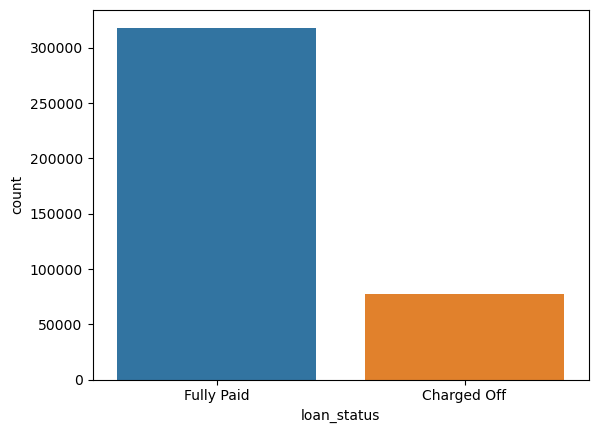

In [720]:
##predict loan_status, create a countplot
sns.countplot(x='loan_status',data=df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

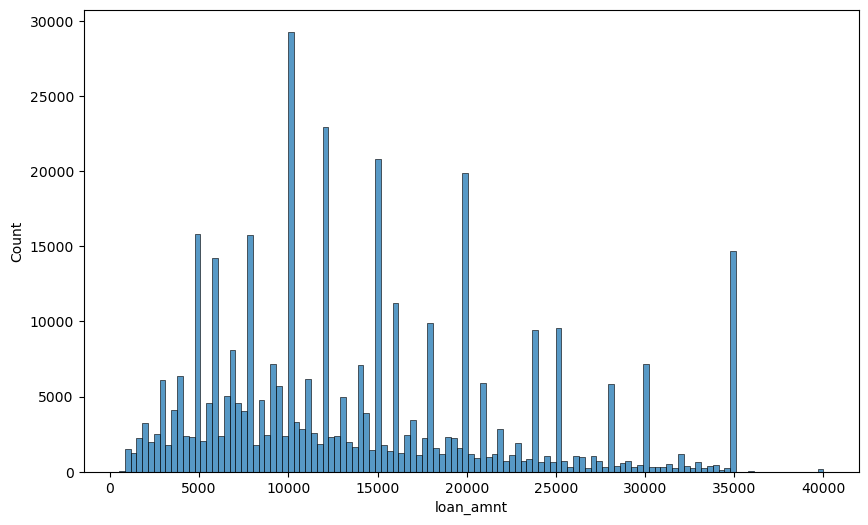

In [721]:
## Create a histogram of the loan_amnt column
plt.figure(figsize=(10,6))
sns.histplot(x='loan_amnt',data=df)

In [722]:
##Calculate the correlation between all continuous numeric variables using .corr() method
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

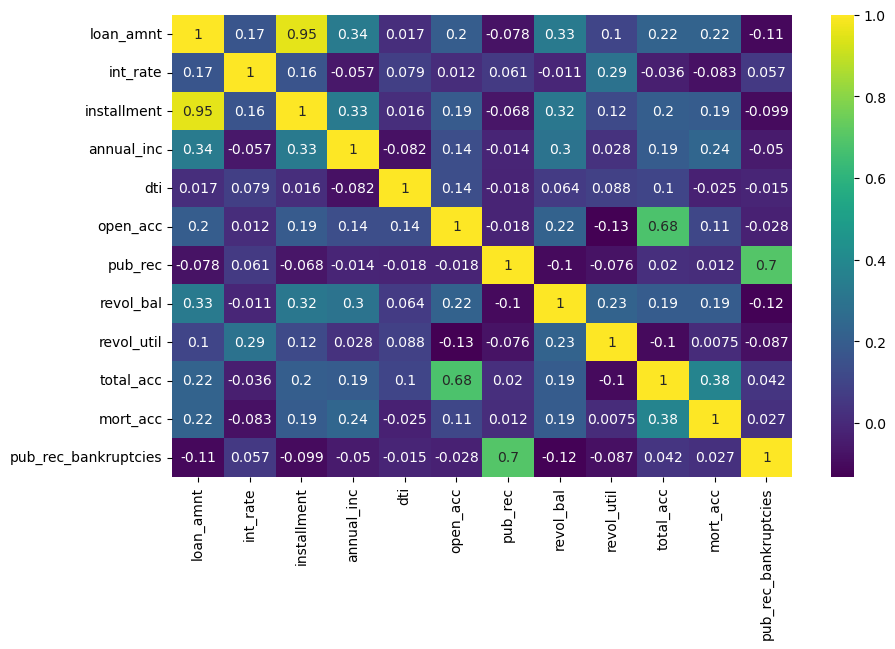

In [723]:
## Visualize this using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis',annot=True)

In [724]:
## Print out 'installment' and 'loan_amnt' descriptions and perform a scatterplot between them
print(feat_info('loan_amnt'))
print(feat_info('installment'))

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
None
The monthly payment owed by the borrower if the loan originates.
None


<Axes: xlabel='installment', ylabel='loan_amnt'>

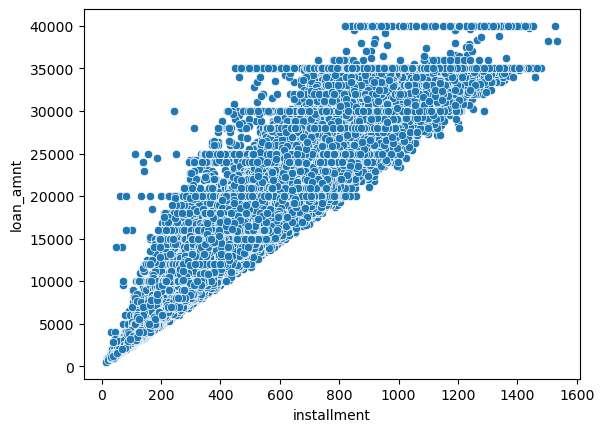

In [725]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

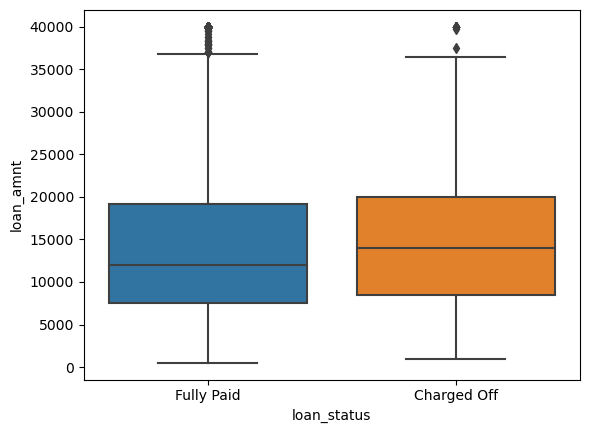

In [726]:
## Create a boxplot showing the relationship between the loan_status and the Loan Amount
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [727]:
## Calculate the summary statistics for the loan amount, grouped by the loan_status
df.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [728]:
## What are the unique possible grades and subgrades?
df['grade'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [729]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

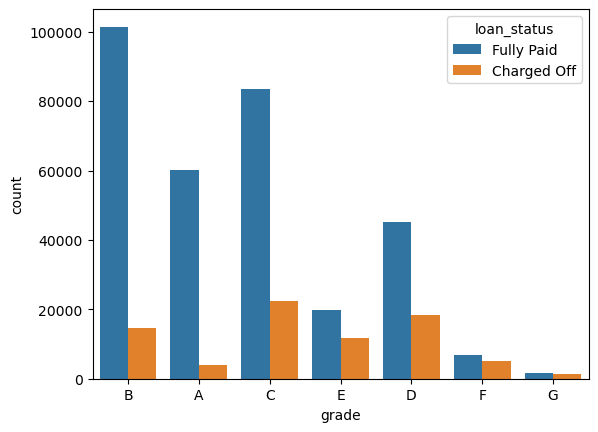

In [730]:
## Create a countplot per grade. Set the hue to the loan_status label
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

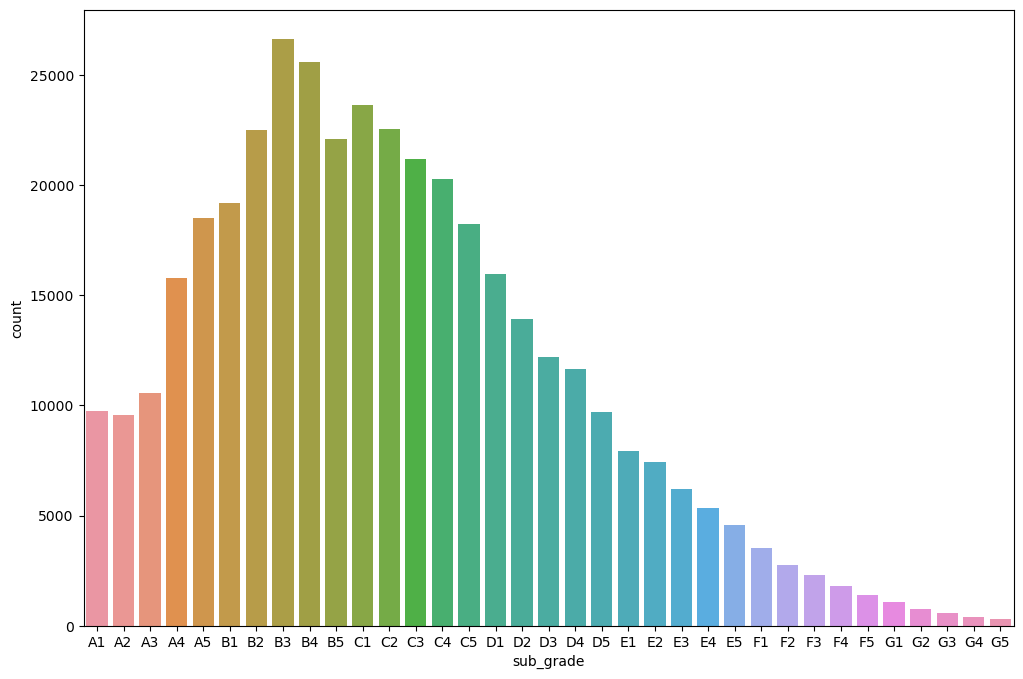

In [731]:
## Display a count plot per subgrade
plt.figure(figsize=(12,8))
order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=order)

<Axes: xlabel='sub_grade', ylabel='count'>

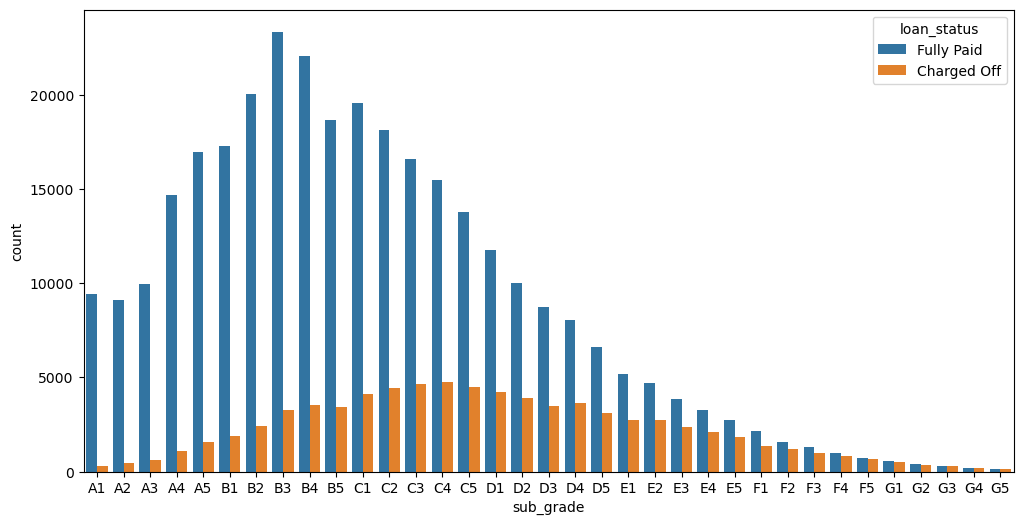

In [732]:
## create a similar plot, but set hue="loan_status"
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,order=order,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

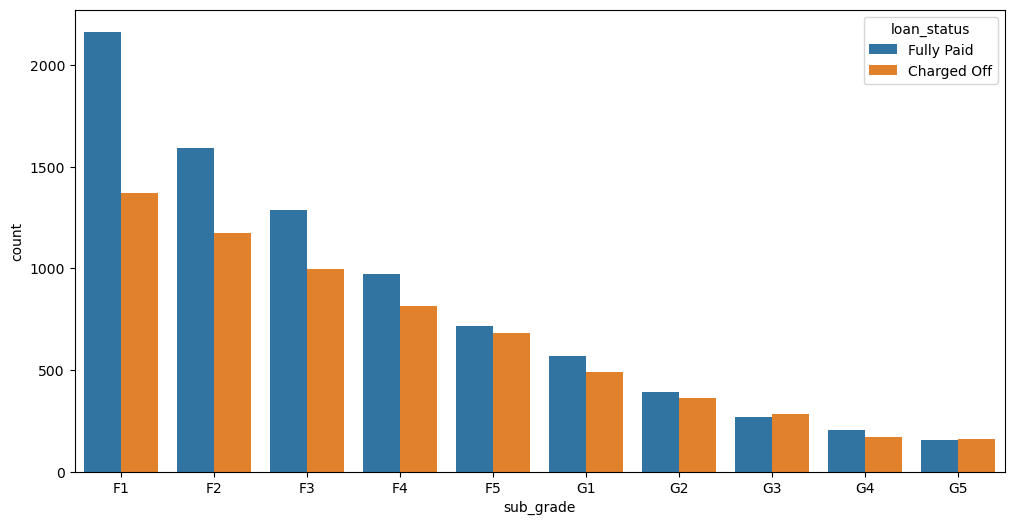

In [733]:
##looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades
plt.figure(figsize=(12,6))
df_fg = df[df['sub_grade'].str.startswith(('F', 'G'))]

order = sorted(df_fg['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df_fg, order=order,hue='loan_status')

In [734]:
## Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"
df['loan_repaid'] = df['loan_status'].apply(lambda x: 0.0 if x== 'Charged Off' else 1.0)

In [735]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0.0


<Axes: >

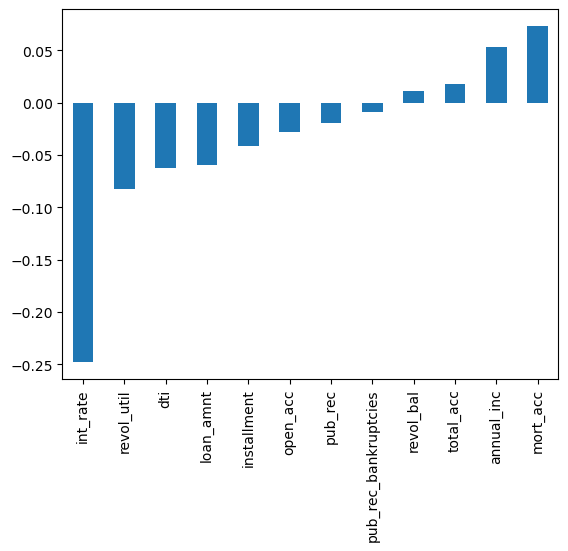

In [736]:
## Create a bar plot showing the correlation of the numeric features to the new loan_repaid column
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Preprocessing

In [737]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0.0


# Missing Data

In [738]:
## What is the length of the dataframe?
len(df)

396030

In [739]:
## Create a Series that displays the total count of missing values per column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [740]:
## Convert this Series to be in term of percentage of the total DataFrame
(df.isnull().sum()/len(df))*100   ## each column is divided by total num of rows 

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [741]:
## Print out their feature information using the feat_info() function from the top of this notebook
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [742]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [743]:
## How many unique employment job titles are there?
df['emp_title'].nunique()

173105

In [744]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [745]:
## Let's remove that emp_title column
df = df.drop('emp_title',axis=1)

In [746]:
## Create a count plot of the emp_length feature column. Challenge: Sort the order of the values
df['emp_length'].sort_values().dropna().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype=object)

In [747]:
emp_length_order = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years' ]

<Axes: xlabel='emp_length', ylabel='count'>

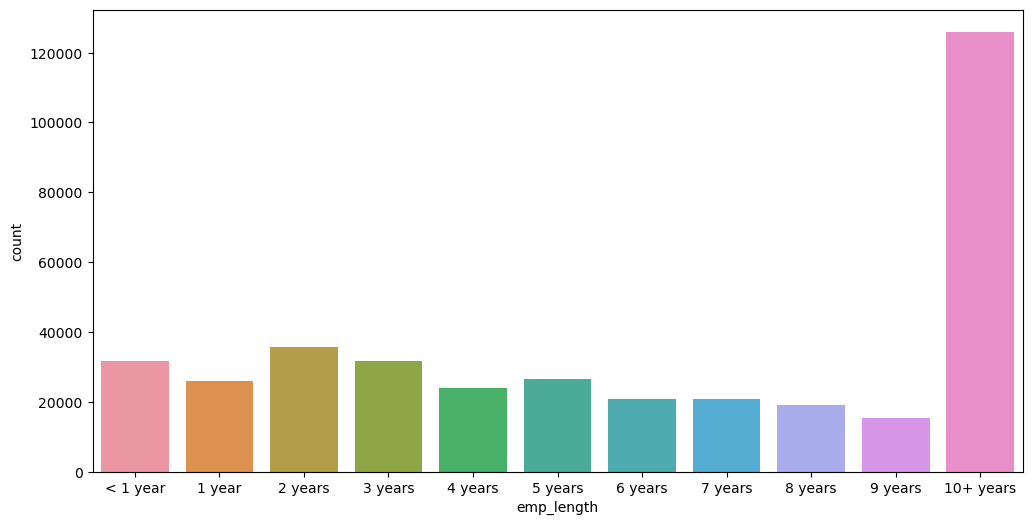

In [748]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order= emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

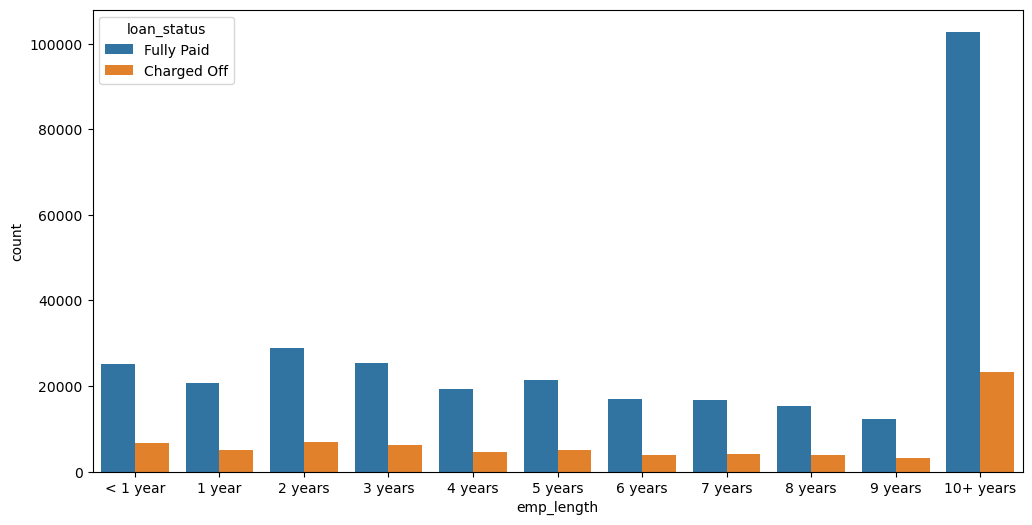

In [749]:
##  Plot out the countplot with a hue separating Fully Paid vs Charged Off
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order= emp_length_order,hue='loan_status')

In [750]:
## This still doesn't really inform us if there is a strong relationship between employment length and being charged off, 
## what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment 
## category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if 
## visualize it with a bar plot. 

emp_cho = df[df['loan_status']=='Charged Off'].groupby('emp_length').count() ## count non null value 4 each column
emp_cho

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,...,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,...,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,...,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,...,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,...,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,...,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,...,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,...,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [751]:
emp_cho = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']#take only loan_status clmn
emp_cho

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [752]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [753]:
## percentage of charge off per category
emp_cho_per = emp_cho / emp_fp

<Axes: xlabel='emp_length'>

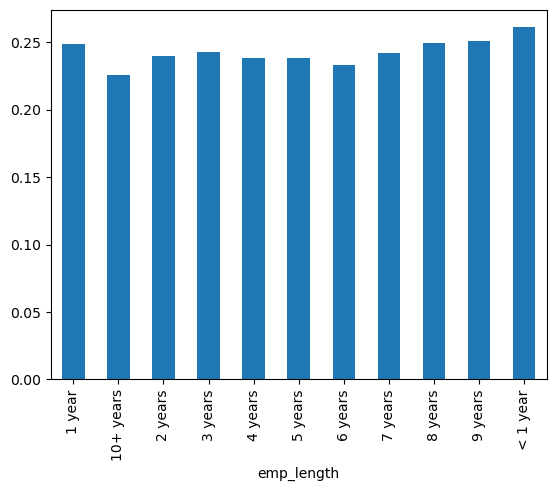

In [754]:
emp_cho_per.plot(kind='bar')

In [755]:
## drop the emp_length column
df = df.drop('emp_length',axis=1)

In [756]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [757]:
## Review the title column vs the purpose column. Is this repeated information?
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [758]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [759]:
## drop the title column
df = df.drop('title',axis=1)

In [760]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [761]:
## Find out what the mort_acc feature represents
feat_info('mort_acc')

Number of mortgage accounts.


In [762]:
## Create a value_counts of the mort_acc column
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [763]:
## review the other columsn to see which most highly correlates to mort_acc
df.corr(numeric_only=True)['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [764]:
## We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [765]:
def fill_miss(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [766]:
df['mort_acc']=df.apply(lambda x: fill_miss(x['total_acc'],x['mort_acc']),axis=1)

In [767]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [768]:
# revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. 
#Go ahead and remove the rows that are missing those values in those columns with dropna()
df = df.dropna()

In [769]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables
## deal with the string values due to the categorical columns

In [770]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [771]:
## List all the columns that are currently non-numeric
gs = df.columns.to_series().groupby(df.dtypes).groups
gs

{float64: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid'], object: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']}

In [772]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [773]:
## Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map()
df['term'] = df['term'].apply(lambda term: float(term[:3]))

In [774]:
gs = df.columns.to_series().groupby(df.dtypes).groups
gs

{float64: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid'], object: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']}

In [775]:
## drop grade feature
df = df.drop('grade',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  float64
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  revol

In [776]:
## convert sub_grade to dummies
subgrade_dum = pd.get_dummies(df['sub_grade'],drop_first=True,dtype=float)

In [777]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dum],axis=1)

In [778]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [779]:
gs = df.columns.to_series().groupby(df.dtypes).groups
gs

{float64: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], object: ['home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']}

In [780]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [781]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36.0,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36.0,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36.0,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36.0,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60.0,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [782]:
## Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables 
## and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True,dtype=float)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [783]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36.0,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8000.0,36.0,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36.0,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36.0,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60.0,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [784]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [785]:
gs = df.columns.to_series().groupby(df.dtypes).groups
gs

{float64: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT', 'initial_list_status_w', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding'], object: ['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line', 'address']}

In [786]:
# Review the value_counts for the home_ownership column
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [787]:
##convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
home_dummies = pd.get_dummies(df['home_ownership'],drop_first=True,dtype=float)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,home_dummies],axis=1)

In [788]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,8000.0,36.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7200.0,36.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24375.0,60.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [789]:
gs = df.columns.to_series().groupby(df.dtypes).groups
gs

{float64: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT', 'initial_list_status_w', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'], object: ['issue_d', 'loan_status', 'earliest_cr_line', 'address']}

In [790]:
df['address'].head(20)

0          0174 Michelle Gateway\nMendozaberg, OK 22690
1       1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2       87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                 823 Reid Ford\nDelacruzside, MA 00813
4                  679 Luna Roads\nGreggshire, VA 11650
5     1726 Cooper Passage Suite 129\nNorth Deniseber...
6     1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                             USCGC Nunez\nFPO AE 30723
8                              USCGC Tran\nFPO AP 22690
9                  3390 Luis Rue\nMauricestad, VA 00813
10            40245 Cody Drives\nBartlettfort, NM 00813
11     3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12       4173 David Extension\nWest Beckyfort, MS 70466
13             3343 Wells Mews\nShellychester, OR 29597
14    0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15     11629 Sean Hills Suite 614\nStevenfort, HI 30723
16    407 Briggs Lodge Suite 778\nWest Aprilborough,...
17    487 Jennifer Parkway Suite 940\nCummingssh

In [791]:
# Create a column called 'zip_code' that extracts the zip code from the address column
#df['zip_code'] = df['address'].str.findall(r'([0-9]\d+)').apply(lambda x: x[-1] if len(x) >= 1 else '')
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [792]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,zip_code
0,10000.0,36.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22690
1,8000.0,36.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,05113
2,15600.0,36.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,05113
3,7200.0,36.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,00813
4,24375.0,60.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11650


In [793]:
#Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code 
#column along with dropping the address column
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True,dtype=float)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,zip_dummies],axis=1)

In [794]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [795]:
gs = df.columns.to_series().groupby(df.dtypes).groups
gs

{float64: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT', 'initial_list_status_w', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700'], object: ['issue_d', 'loan_status', 'earliest_cr_l

In [796]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [797]:
## drop issue date
df = df.drop('issue_d',axis=1)

In [798]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [799]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [800]:
#Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a 
#feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:float(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [801]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [802]:
gs = df.columns.to_series().groupby(df.dtypes).groups
gs

{float64: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT', 'initial_list_status_w', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700', 'earliest_cr_year'], object: ['loan_status']}

In [803]:
df = df.drop('loan_status',axis=1)

In [804]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  float64
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc          

# Train Test Split 

In [806]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [807]:
X = df.drop('loan_repaid',axis=1).values
y= df['loan_repaid'].values

In [808]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# Normalize Data

In [809]:
#Use a MinMaxScaler to normalize the feature data X_train and X_test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [810]:
X_train = scaler.fit_transform(X_train)

In [811]:
X_test = scaler.transform(X_test)

# Creating Model

In [812]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.constraints import max_norm

In [813]:
model = Sequential()

model.add(Dense(78,activation = 'relu')) #input
model.add(Dropout(0.2))

model.add(Dense(39,activation = 'relu')) #hidden
model.add(Dropout(0.2))

model.add(Dense(19,activation = 'relu')) #hidden
model.add(Dropout(0.2))

model.add(Dense(1,activation = 'sigmoid')) #output

model.compile(loss='binary_crossentropy',optimizer='adam')

In [814]:
#Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256
model.fit(x=X_train,y=y_train,epochs=25,validation_data = (X_test,y_test),batch_size=256)

Epoch 1/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.3013 - val_loss: 0.2663
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2657 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2632 - val_loss: 0.2624
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2619 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2611 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2605 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2602 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2596 - val_loss: 0.2620
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2592 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.259

In [815]:
#save the model
from tensorflow.keras.models import load_model
model.save('keras_tensorflow_project.h5')

C:\Users\roksa\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluating Model Performance

In [816]:
# Plot out the validation loss versus the training loss
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.301250,0.266254
1,0.265673,0.262911
2,0.263157,0.262375
3,0.261888,0.262286
4,0.261116,0.261776
5,0.260533,0.261513
6,0.260197,0.261720
7,0.259643,0.262031
8,0.259205,0.261418
9,0.258967,0.262203


<Axes: >

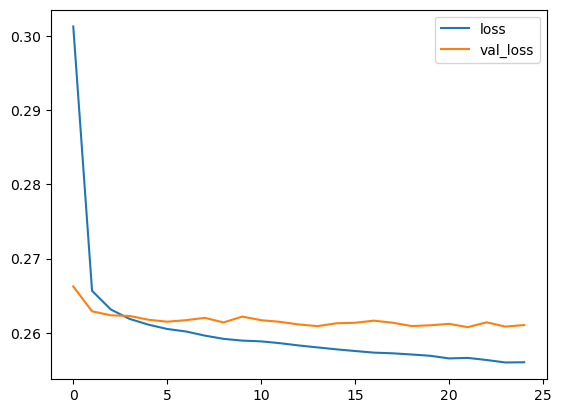

In [817]:
losses[['loss','val_loss']].plot()

In [818]:
#Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set
prediction = (model.predict(X_test)>0.5).astype('int32')

2471/2471 [==============================] - 3s 999us/step


In [819]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.45      0.61     15658
         1.0       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6982  8676]
 [  206 63180]]


In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  float64
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc          

In [823]:
# Given the customer below, would you offer this person a loan?
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [824]:
new_customer_shaped = new_customer.values.reshape(1,78)

In [825]:
predict_new_customer = (model.predict(new_customer_shaped)>0.5).astype('int32')

1/1 [==============================] - 0s 22ms/step


In [826]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1990.0
1,8000.0,36.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004.0
2,15600.0,36.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
3,7200.0,36.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0
4,24375.0,60.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999.0


In [827]:
#Now check, did this person actually end up paying back their loan?
df.iloc[random_ind]['loan_repaid']

1.0